In [10]:
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
import numpy as np
from scipy.stats import multivariate_normal

# Step 1: Simulation of GMM

### Determine the parameter of the Gaussian distributions

In [11]:
#Number of samples
n_samples = 100

mu1, sig1 = -10, 50 # mean and variance
mu2, sig2 = 4, 1.8 # mean and variance

#generating random dataset for the two distribution
X1 = np.random.normal(mu1, np.sqrt(sig1), n_samples)
X2 = np.random.normal(mu2, np.sqrt(sig2), n_samples)

#Combining the two dataset
X = np.array(list(X1) + list(X2))
np.random.shuffle(X)
print("Dataset shape:", X.shape)

Dataset shape: (200,)


### Define the pdf of Gaussian Distributions

In [12]:
def pdf(data, mean: float, variance: float):
  # A normal continuous random variable.
  pdf_gauss1 = 1/(np.sqrt(2*np.pi*variance))
  pdf_gauss2 = np.exp(-(np.square(data - mean)/(2*variance)))
  return pdf_gauss1*pdf_gauss2

### Plot the Gaussian distributions

[]

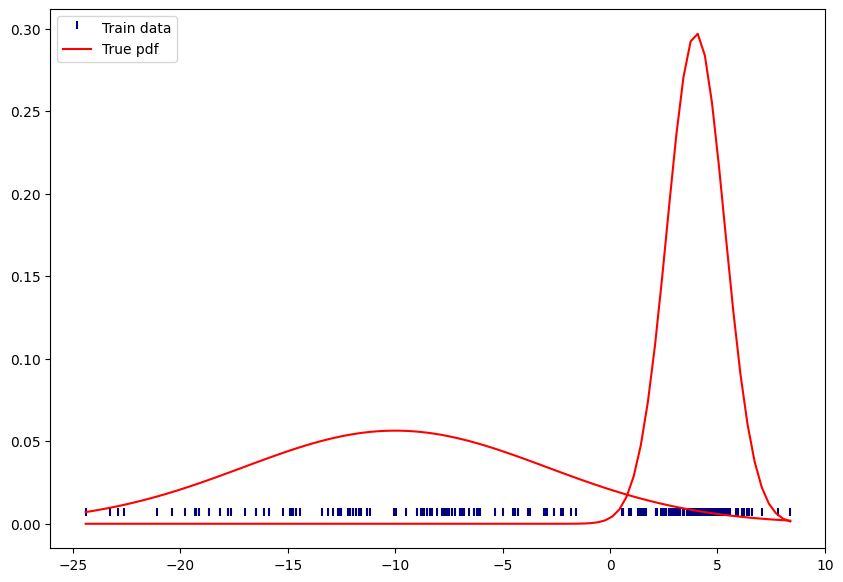

In [13]:
bins = np.linspace(np.min(X),np.max(X),100)

plt.figure(figsize=(10,7))
plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

plt.plot(bins, pdf(bins, mu1, sig1), color='grey', label="True pdf")
plt.plot(bins, pdf(bins, mu2, sig2), color='grey')
#plt.plot(bins, pdf(bins, mu3, sigma3), color='red')

plt.legend()
plt.plot()

# Step 2: Estimating the parameters (knowing that the data come from 2 Gaussians)

### Define the number of Gaussian distributions (k=2) and initial parameters

In [14]:
#Number of Gaussian distributions
k = 2

#Setting initial parameters
weights = np.ones((k)) / k
means = np.random.choice(X, k)
variances = np.random.random_sample(size=k)
print(type(means), variances)
print(means)
X = np.array(X)
print(X.shape)

<class 'numpy.ndarray'> [0.74766464 0.09251257]
[  4.40420203 -14.89093119]
(200,)


### Run GMM and plot the EM algorithm (each iteration)

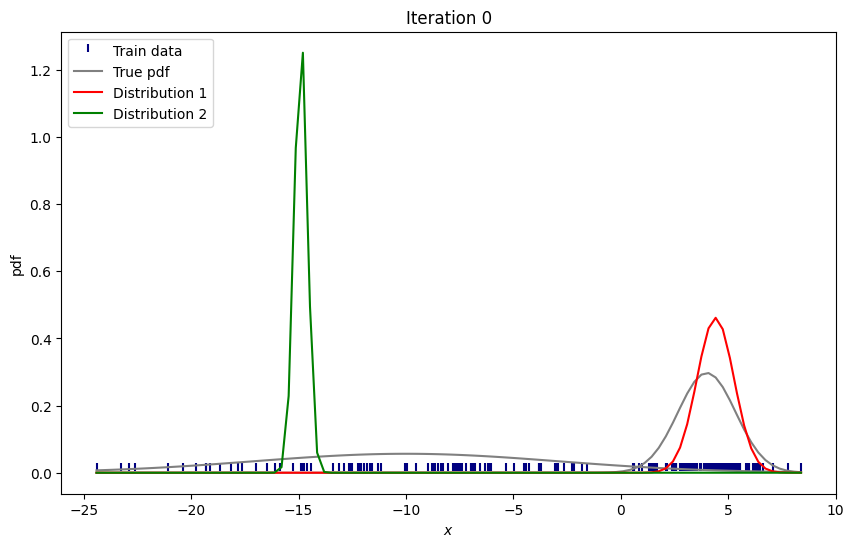

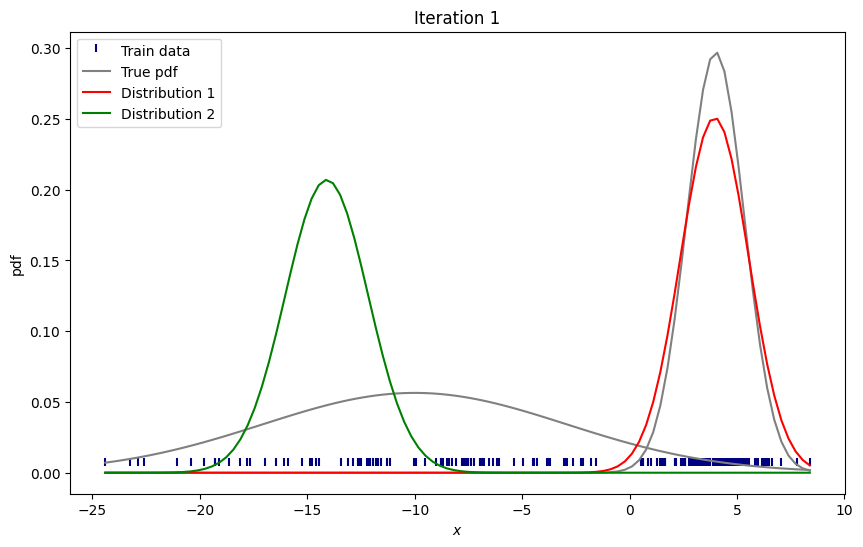

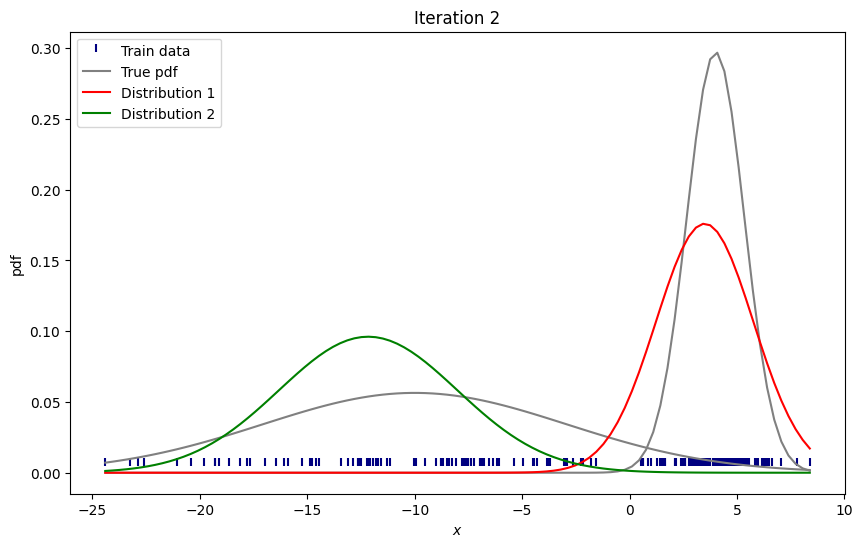

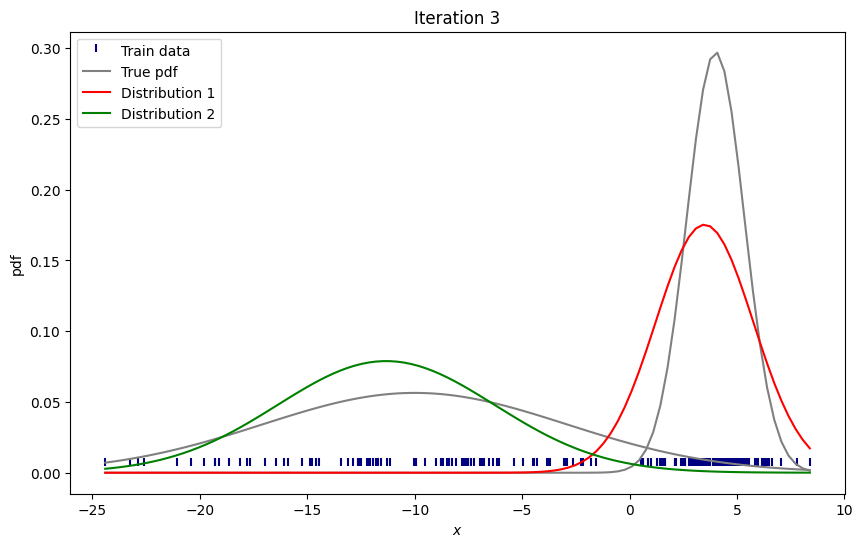

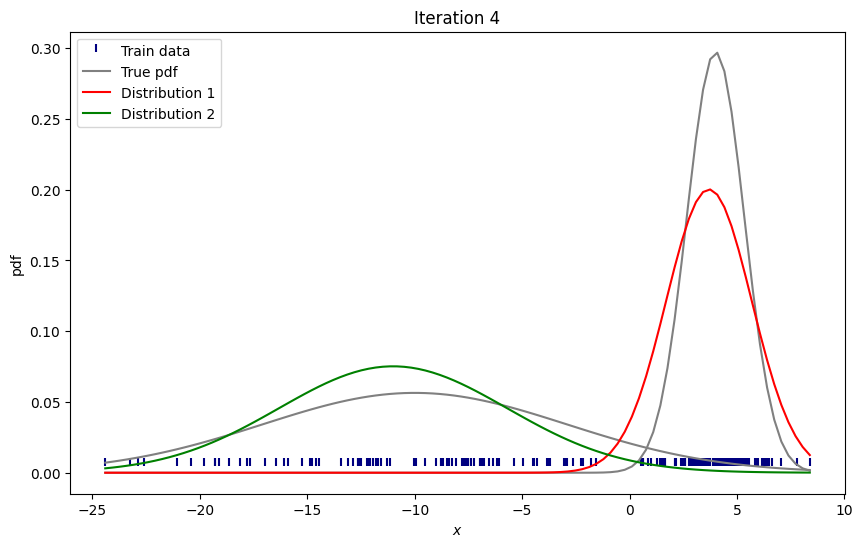

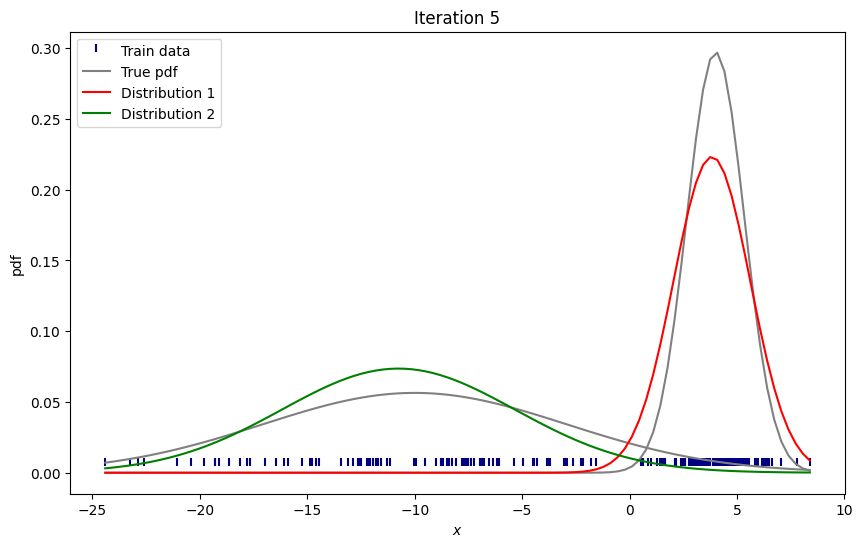

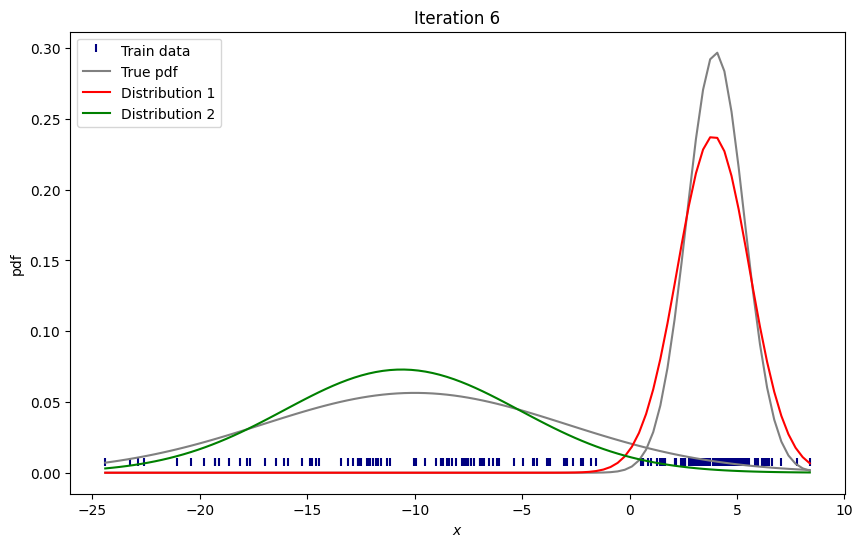

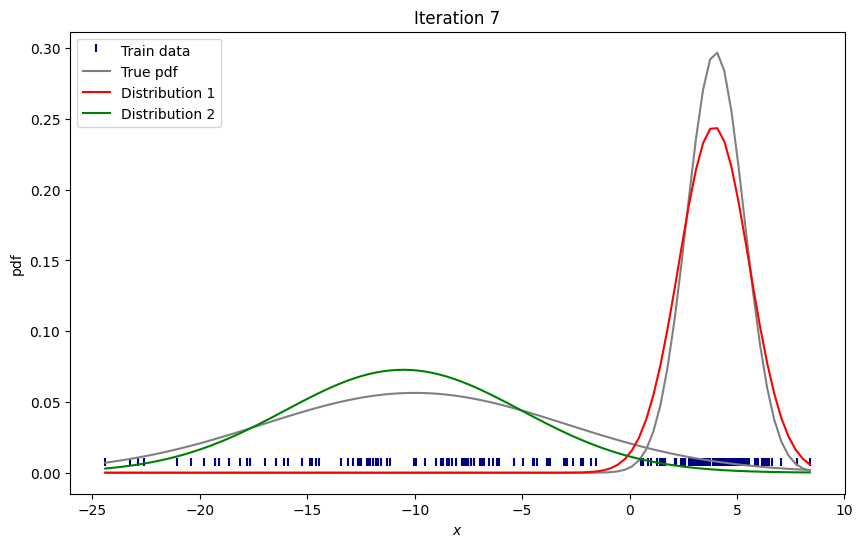

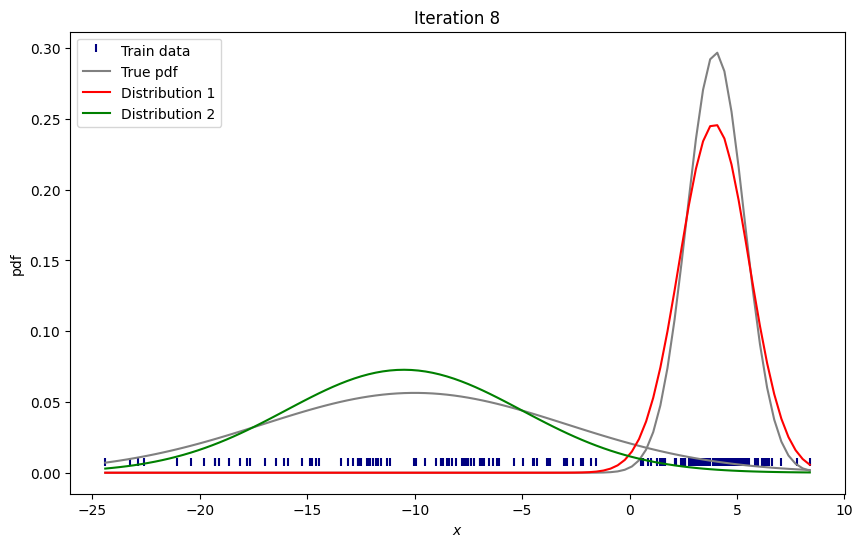

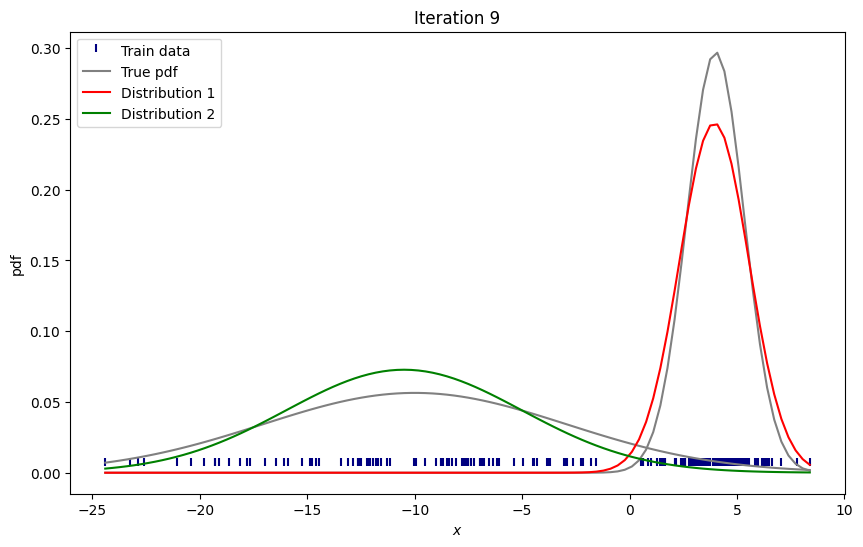

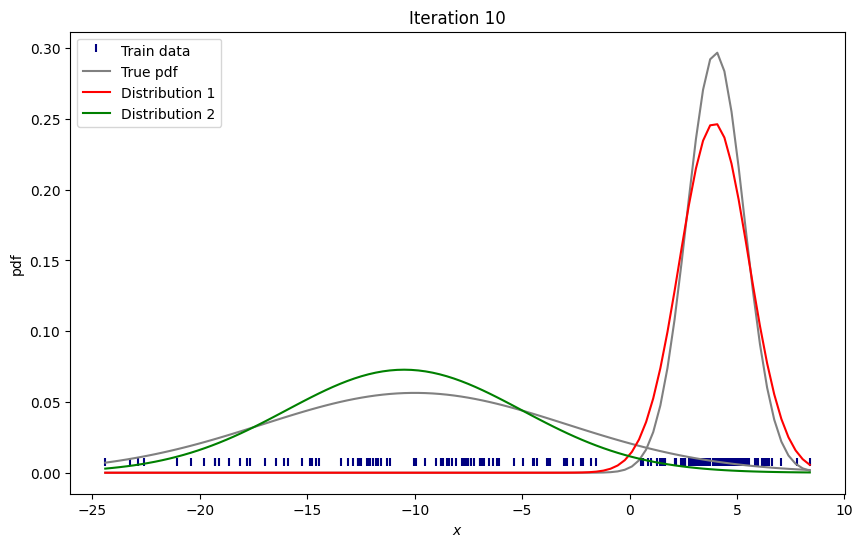

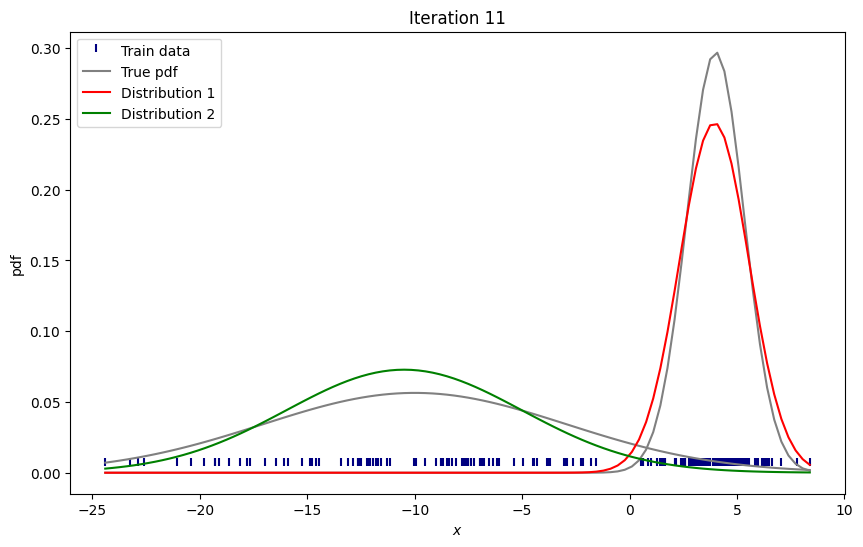

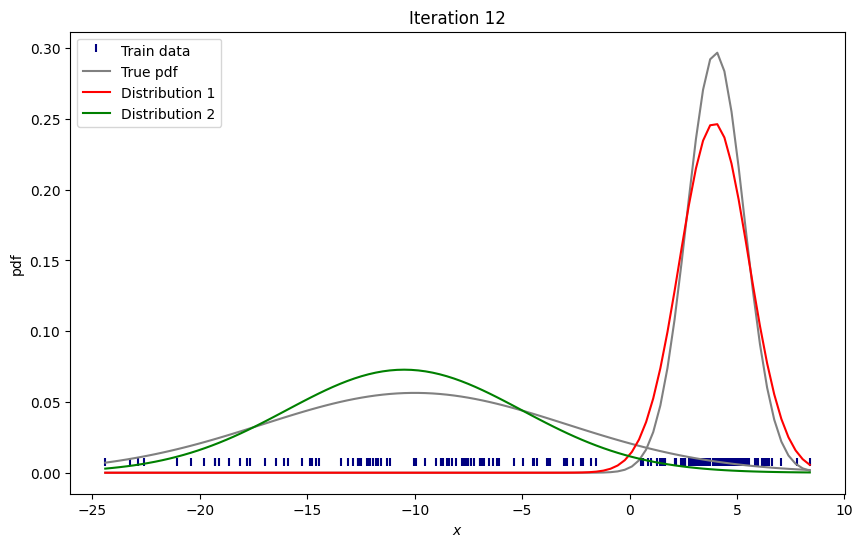

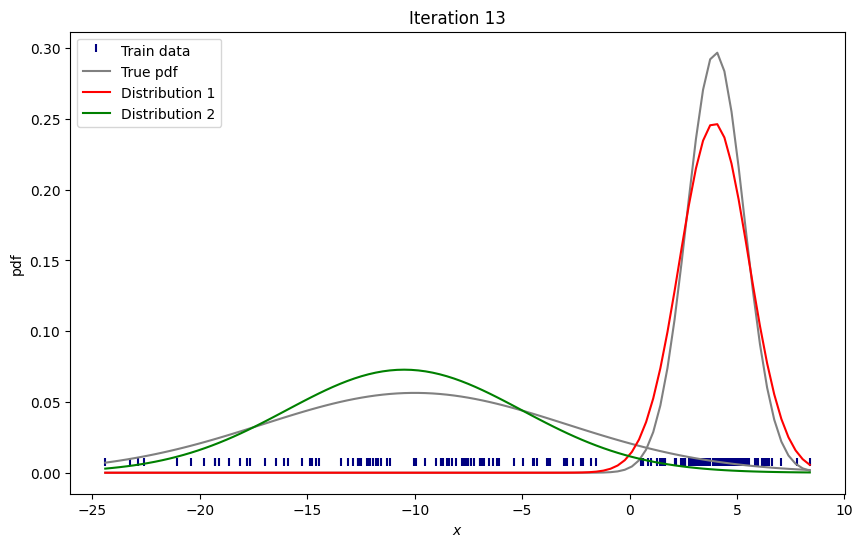

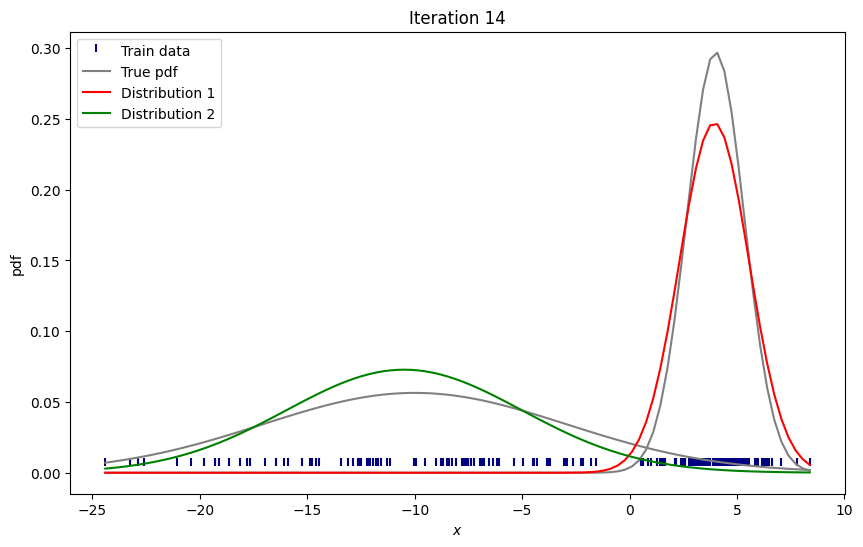

In [15]:
eps=1e-8
means_all=[]
var_all=[]
for step in range(15): #change range value to add more iterations
  
  if step % 1 == 0:
    plt.figure(figsize=(10,6))
    axes = plt.gca()
    plt.xlabel("$x$")
    plt.ylabel("pdf")
    plt.title("Iteration {}".format(step))
    plt.scatter(X, [0.005] * len(X), color='navy', s=30, marker=2, label="Train data")

    plt.plot(bins, pdf(bins, mu1, sig1), color='grey', label="True pdf")
    plt.plot(bins, pdf(bins, mu2, sig2), color='grey')

    plt.plot(bins, pdf(bins, means[0], variances[0]), color='red', label="Distribution 1")
    plt.plot(bins, pdf(bins, means[1], variances[1]), color='green', label="Distribution 2")
    
    plt.legend(loc='upper left')
    
    #plt.savefig("img_{0:02d}".format(step), bbox_inches='tight')
    plt.show()
  
  # calculate the maximum likelihood of each observation xi
  likelh = []
  

  # Expectation step
  for j in range(k):
    likelh.append(pdf(X, means[j], np.sqrt(variances[j])))
  likelh = np.array(likelh)
    
  b = []
  # Maximization step 
  for j in range(k):
    # use the current values for the parameters to evaluate the posterior
    # probabilities of the data to have been generanted by each gaussian    
    b.append((likelh[j] * weights[j]) / (np.sum([likelh[i] * weights[i] for i in range(k)], axis=0)+eps))
  
    # updage mean and variance
    means[j] = np.sum(b[j] * X) / (np.sum(b[j]+eps))
    variances[j] = np.sum(b[j] * np.square(X - means[j])) / (np.sum(b[j]+eps))
    
    # update the weights
    weights[j] = np.mean(b[j])



In [16]:
# convert images into gif. Note: takes a long time to do
#!sudo apt-get install ffmpeg imagemagick
!convert -delay 50 -loop 0 *.png out_.gif

zsh:1: no matches found: *.png
